In [13]:
# Packages
import h5py
import numpy as np
from amuse.units import units
import matplotlib.pyplot as plt

path = 'data/tidal_only/'

In [23]:
def plot_moon(moon, tidal=False, kozai=False, save=False):
    
    if kozai:
        name = 'kozai.hdf5'
        title = moon + '_kozai'
    if tidal:
        name = 'tidal.hdf5'
        title = moon + ' tidal'
    
    if moon=='io':
        res = h5py.File(path+'io_'+ name)
    if moon=='eu':
        res = h5py.File(path+'eu_'+ name)
    if moon=='ga':
        res = h5py.File(path+'ga_'+ name)
    if moon=='ca':
        res = h5py.File(path+'ca_'+ name)

    ecc = res['ecc'][:]
    inc = res['inc'][:]
    sma = res['sma'][:]
    time_range = res['time'][:]

    plt.rcParams.update({'font.size': 20})
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=[20, 15], tight_layout=True)
    colours = ['r', 'g', 'b', 'm']

    porb = np.array(sma) * (1-np.array(ecc))
    ax1.plot(time_range, porb, color='r', label=moon)
    ax1.set_ylabel('Periapsis')

    ax2.plot(time_range, ecc, color=colours[0], label=moon)   
    ax2.set_ylabel('Eccentricity')
    ax2.set_xlabel('Time [years]')
    ax2.legend()

    ax3.plot(time_range, sma, color=colours[0], label=moon)   
    ax3.set_ylabel('Semimajor Axis')
    ax3.set_xlabel('Time [years]')
    ax3.legend()

    res.close()
    
    ax1.set_title(title)
    if save == True:
        if tidal == True:
            plt.savefig(moon+'_tidal.png')
        if kozai == True:
            plt.savefig(moon+'_kozai.png')
    plt.show()

<ipython-input-23-19579eef7468>:17: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  res = h5py.File(path+'ca_'+ name)


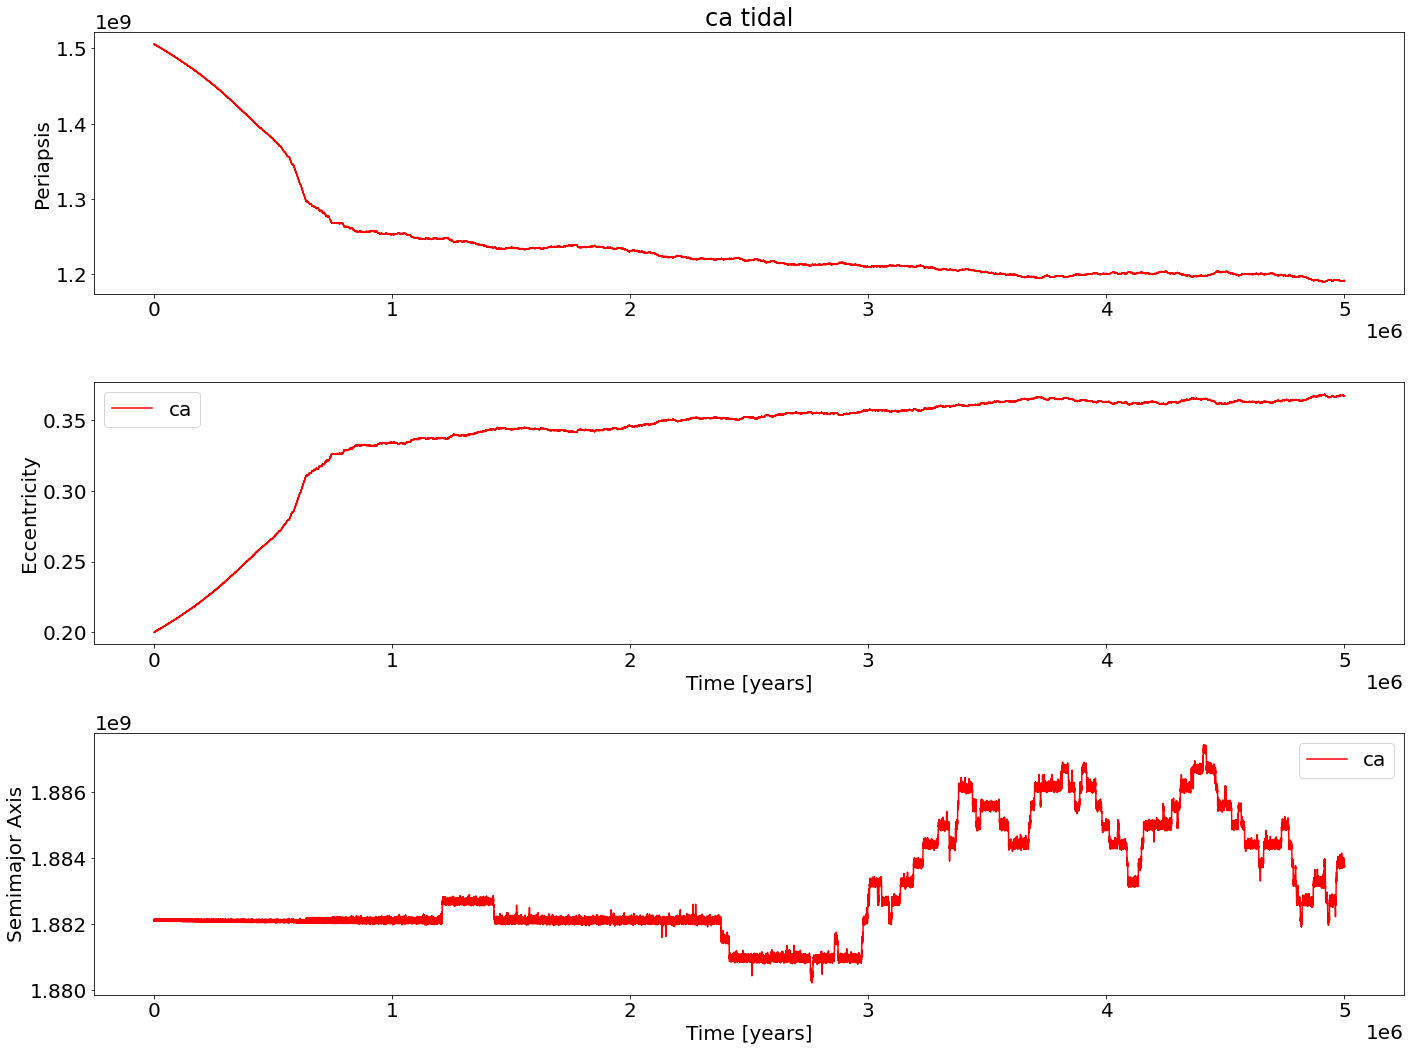

In [27]:
plot_moon('ca', tidal=True, kozai=False, save=True)